### Time Series Basics in python
We will explore the basics of time series using two datasets: The airline passenger dataset, and AAPL stock dataset

We will be using PyCaret, a powerful library that integrates several essential tools and libraries for time series analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

### Data Loading

In [2]:
airpass = pd.read_csv("airline_passengers.csv", index_col='Month')
airpass.head()

,Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


In [8]:
aapl_close = yf.download('AAPL', start='2021-12-22',end='2024-05-01')['Close']
aapl_close.head()

[*********************100%***********************]  1 of 1 completed


Ticker,AAPL
Date,
2021-12-22,172.619461
2021-12-23,173.248428
2021-12-27,177.228821
2021-12-28,176.206665
2021-12-29,176.295166


In [5]:
airpass.index

Index(['1949-01', '1949-02', '1949-03', '1949-04', '1949-05', '1949-06',
       '1949-07', '1949-08', '1949-09', '1949-10',
       ...
       '1960-03', '1960-04', '1960-05', '1960-06', '1960-07', '1960-08',
       '1960-09', '1960-10', '1960-11', '1960-12'],
      dtype='object', name='Month', length=144)

In [6]:
# Convert the 'Month' column to datetime format
airpass.index = pd.to_datetime(airpass.index).to_period('M')

airpass.index

PeriodIndex(['1949-01', '1949-02', '1949-03', '1949-04', '1949-05', '1949-06',
             '1949-07', '1949-08', '1949-09', '1949-10',
             ...
             '1960-03', '1960-04', '1960-05', '1960-06', '1960-07', '1960-08',
             '1960-09', '1960-10', '1960-11', '1960-12'],
            dtype='period[M]', name='Month', length=144)

In [9]:
# Convert the index to a datetime index if it's not already
aapl_close.index = pd.to_datetime(aapl_close.index)
aapl_close.index

DatetimeIndex(['2021-12-22', '2021-12-23', '2021-12-27', '2021-12-28',
               '2021-12-29', '2021-12-30', '2021-12-31', '2022-01-03',
               '2022-01-04', '2022-01-05',
               ...
               '2024-04-17', '2024-04-18', '2024-04-19', '2024-04-22',
               '2024-04-23', '2024-04-24', '2024-04-25', '2024-04-26',
               '2024-04-29', '2024-04-30'],
              dtype='datetime64[ns]', name='Date', length=591, freq=None)

In [10]:
# Set the index frequency to business day
aapl_close = aapl_close.asfreq('B')
aapl_close.index

DatetimeIndex(['2021-12-22', '2021-12-23', '2021-12-24', '2021-12-27',
               '2021-12-28', '2021-12-29', '2021-12-30', '2021-12-31',
               '2022-01-03', '2022-01-04',
               ...
               '2024-04-17', '2024-04-18', '2024-04-19', '2024-04-22',
               '2024-04-23', '2024-04-24', '2024-04-25', '2024-04-26',
               '2024-04-29', '2024-04-30'],
              dtype='datetime64[ns]', name='Date', length=615, freq='B')

In [11]:
# Set the index frequency to business day
aapl_close = aapl_close.asfreq('B')
aapl_close.index

DatetimeIndex(['2021-12-22', '2021-12-23', '2021-12-24', '2021-12-27',
               '2021-12-28', '2021-12-29', '2021-12-30', '2021-12-31',
               '2022-01-03', '2022-01-04',
               ...
               '2024-04-17', '2024-04-18', '2024-04-19', '2024-04-22',
               '2024-04-23', '2024-04-24', '2024-04-25', '2024-04-26',
               '2024-04-29', '2024-04-30'],
              dtype='datetime64[ns]', name='Date', length=615, freq='B')

In [12]:
# Forward fill missing values
aapl_close = aapl_close.fillna(method='ffill')

aapl_close.head() # pay attention to the inferred data for Christmas Eve which the market is closed

Ticker,AAPL
Date,
2021-12-22,172.619461
2021-12-23,173.248428
2021-12-24,173.248428
2021-12-27,177.228821
2021-12-28,176.206665


### Data Exploration

In [13]:
# Check for missing values in both datasets
print("Missing values in Airline Passengers Data:")
print(airpass.isnull().sum())

print("\nMissing values in AAPL Stock Data:")
print(aapl_close.isnull().sum())

Missing values in Airline Passengers Data:
Passengers    0
dtype: int64

Missing values in AAPL Stock Data:
Ticker
AAPL    0
dtype: int64


In [14]:
# Display the summary statistics of both datasets
print("\nSummary statistics for Airline Passengers Data:")
print(airpass.describe())
print(airpass.info())

print("\nSummary statistics for AAPL Stock Data:")
print(aapl_close.describe())
print(aapl_close.info())


Summary statistics for Airline Passengers Data:
       Passengers
count  144.000000
mean   280.298611
std    119.966317
min    104.000000
25%    180.000000
50%    265.500000
75%    360.500000
max    622.000000
<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 144 entries, 1949-01 to 1960-12
Freq: M
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB
None

Summary statistics for AAPL Stock Data:
Ticker        AAPL
count   615.000000
mean    164.212903
std      17.768629
min     123.583107
25%     149.367805
50%     166.991470
75%     177.160423
max     196.927673
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 615 entries, 2021-12-22 to 2024-04-30
Freq: B
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    615 non-null    float64
dtypes: float64(1)
memory usage: 9.6 KB
None


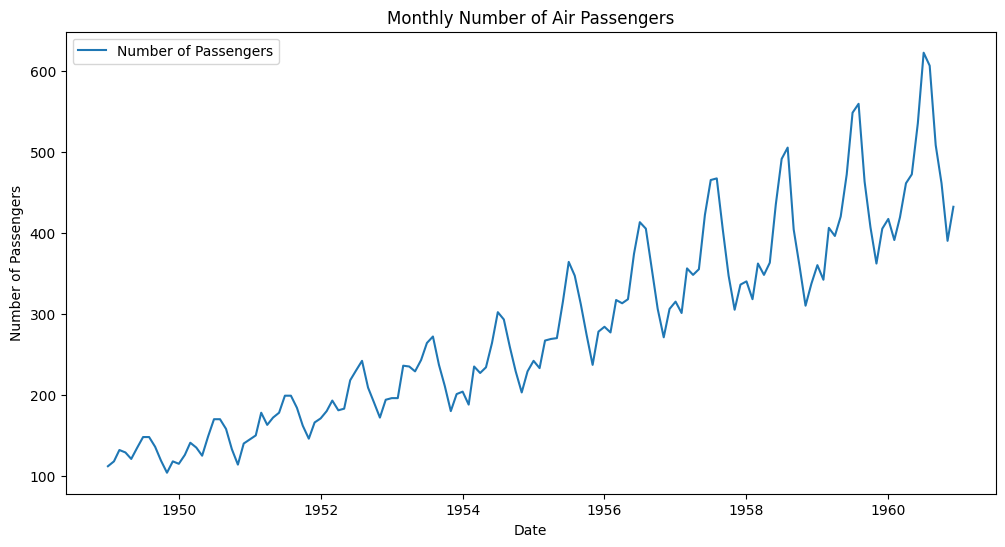

In [15]:
# Plot the airline passengers time series data
plt.figure(figsize=(12, 6))
plt.plot(airpass.index.to_timestamp() , airpass['Passengers'], label='Number of Passengers')
plt.title('Monthly Number of Air Passengers')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

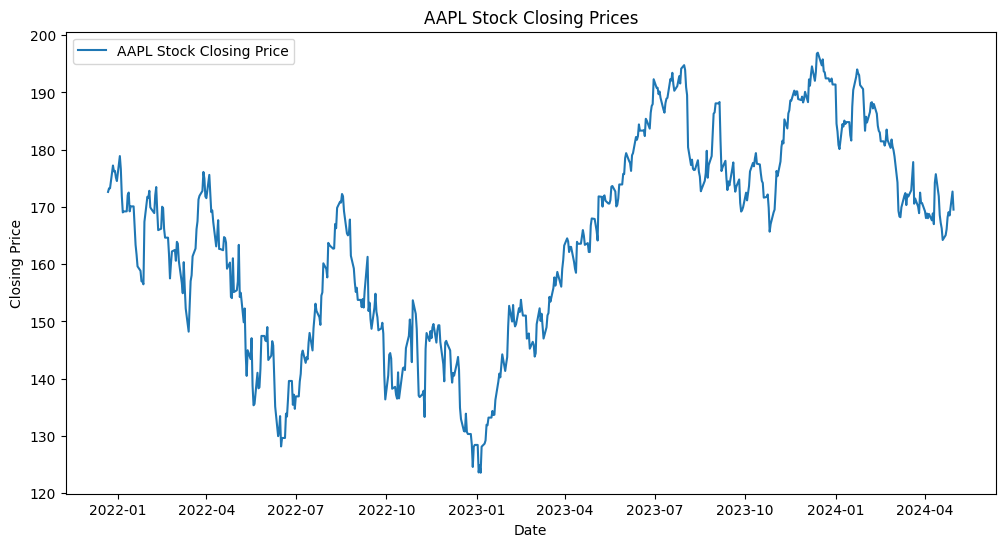

In [16]:
# Plot the AAPL stock closing price time series data
plt.figure(figsize=(12, 6))
plt.plot(aapl_close, label='AAPL Stock Closing Price')
plt.title('AAPL Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

### Data Transformation
Transformations can help in stabilizing the variance and making the data more suitable for modeling.

However, it's important to note that these transformations can significantly alter the interpretation of the data, so they should be used with caution. 

         Passengers  Log_Passengers
Month                              
1949-01         112        4.718499
1949-02         118        4.770685
1949-03         132        4.882802
1949-04         129        4.859812
1949-05         121        4.795791


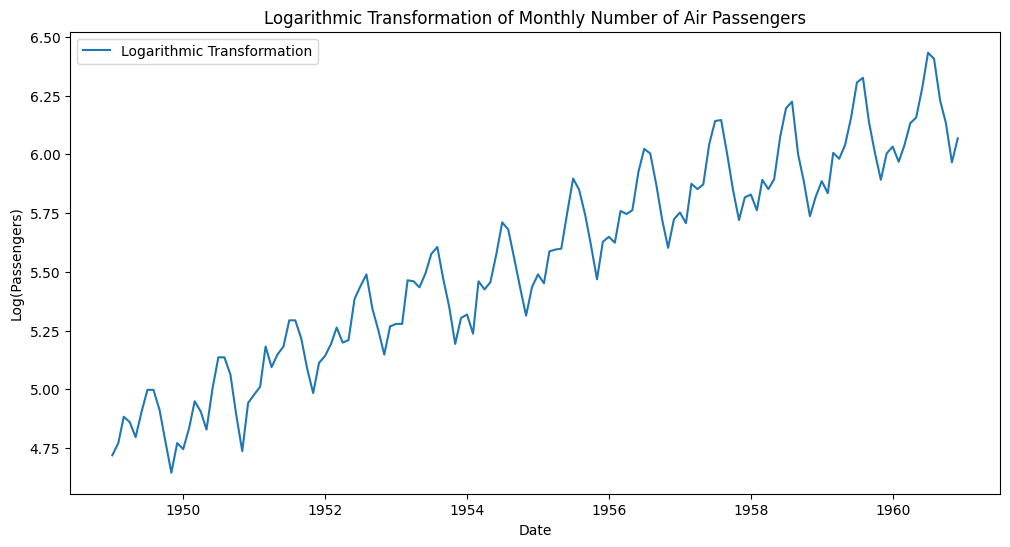

In [17]:
# Apply logarithmic transformation
airpass['Log_Passengers'] = np.log(airpass['Passengers'])
print(airpass.head())

# Plot the transformed data
plt.figure(figsize=(12, 6))
plt.plot(airpass.index.to_timestamp(), airpass['Log_Passengers'], label='Logarithmic Transformation')
plt.title('Logarithmic Transformation of Monthly Number of Air Passengers')
plt.xlabel('Date')
plt.ylabel('Log(Passengers)')
plt.legend()
plt.show()

         Passengers  Log_Passengers  Sqrt_Passengers
Month                                               
1949-01         112        4.718499        10.583005
1949-02         118        4.770685        10.862780
1949-03         132        4.882802        11.489125
1949-04         129        4.859812        11.357817
1949-05         121        4.795791        11.000000


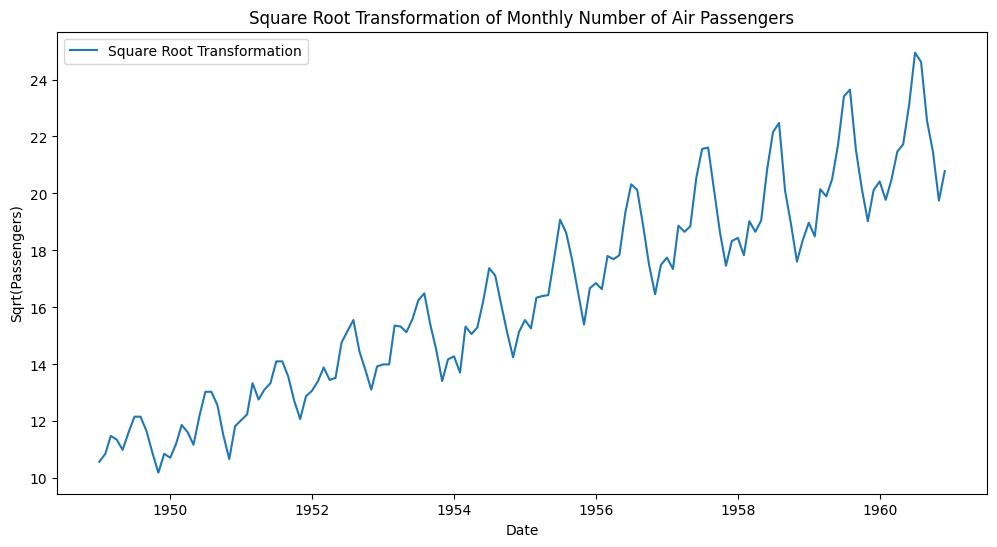

In [18]:
# Apply square root transformation
airpass['Sqrt_Passengers'] = np.sqrt(airpass['Passengers'])
print(airpass.head())

# Plot the transformed data
plt.figure(figsize=(12, 6))
plt.plot(airpass.index.to_timestamp(), airpass['Sqrt_Passengers'], label='Square Root Transformation')
plt.title('Square Root Transformation of Monthly Number of Air Passengers')
plt.xlabel('Date')
plt.ylabel('Sqrt(Passengers)')
plt.legend()
plt.show()

#### Box-Cox Transformation
The Box-Cox transformation is a more flexible transformation that can handle a wide range of data distributions. It requires all values to be positive, which our dataset already satisfies.
* λ = 1 No transformation (the data remains unchanged).
* λ = 0 Logarithmic transformation.
* λ = 0.5 Square root transformation.
* Optimized λ: The scipy.stats package provides a method to find the optimal value of that maximizes the log-likelihood function of the transformed data. This means that the transformed data is as close to normally distributed as possible, with stabilized variance. This is done using the boxcox function, which returns both the transformed data and the optimal λ.

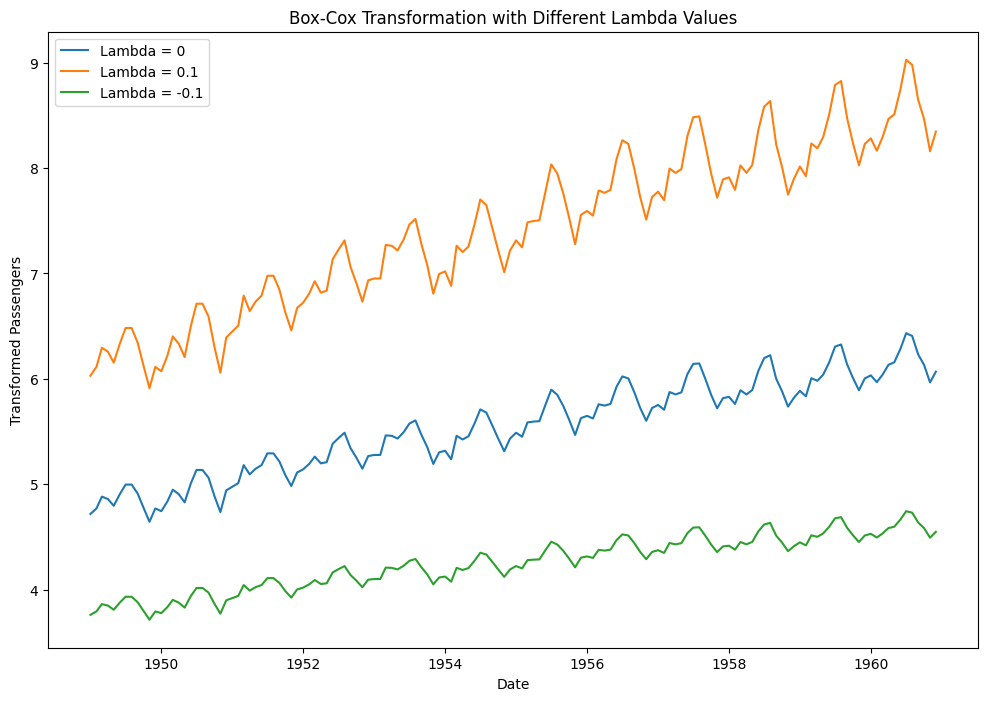

In [19]:
# Let's start by defining our own boxcox transformation function 

def boxcox_transform_and_plot(data, lambda_values):
    """
    Apply Box-Cox transformation to the data for different lambda values and plot the results.
    
    Parameters:
    data (pd.Series): The input time series data.
    lambda_values (list): A list of lambda values for the Box-Cox transformation.
    """
    plt.figure(figsize=(12, 8))
    
    for lmbda in lambda_values:
        if lmbda == 0:
            transformed_data = np.log(data)
        else:
            transformed_data = (data**lmbda - 1) / lmbda
        
        plt.plot(data.index.to_timestamp(), transformed_data, label=f'Lambda = {lmbda}')
    
    plt.title('Box-Cox Transformation with Different Lambda Values')
    plt.xlabel('Date')
    plt.ylabel('Transformed Passengers')
    plt.legend()
    plt.show()

# List of lambda values to visualize
lambda_values = [0, 0.1, -0.1] # you can try 1 to get the original data. 

# Apply the function to the airline passenger data
boxcox_transform_and_plot(airpass['Passengers'], lambda_values)

         Passengers  Log_Passengers  Sqrt_Passengers  boxcox_Passengers
Month                                                                  
1949-01         112        4.718499        10.583005           6.827490
1949-02         118        4.770685        10.862780           6.932822
1949-03         132        4.882802        11.489125           7.161892
1949-04         129        4.859812        11.357817           7.114611
1949-05         121        4.795791        11.000000           6.983787


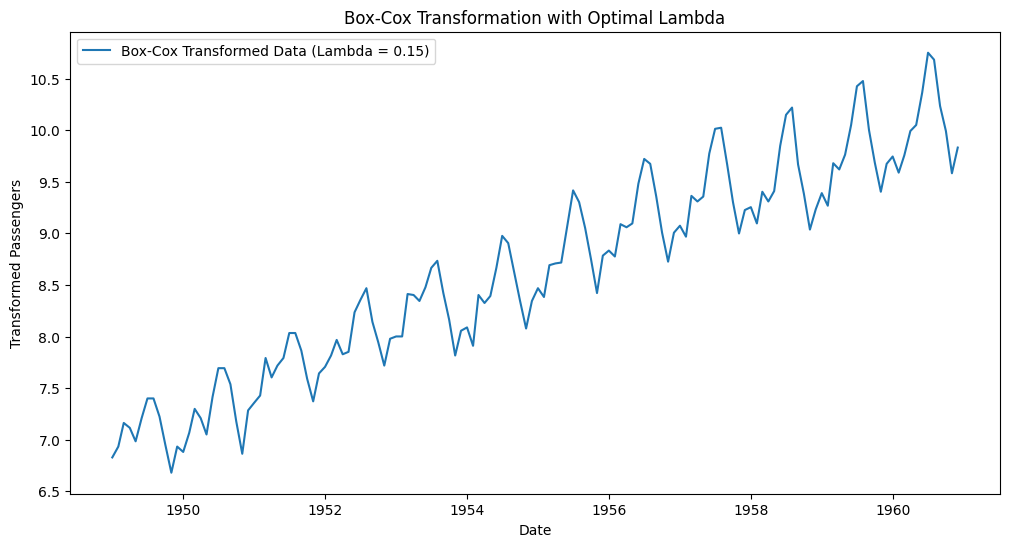

The optimal lambda for Box-Cox transformation is: 0.14802265137037945


In [20]:
from scipy.stats import boxcox
# Apply Box-Cox transformation to find the optimal lambda
airpass['boxcox_Passengers'] , optimal_lambda = boxcox(airpass.Passengers)
print(airpass.head())

# Plot the transformed data with optimal lambda
plt.figure(figsize=(12, 6))
plt.plot(airpass.index.to_timestamp(), airpass['boxcox_Passengers'] , label=f'Box-Cox Transformed Data (Lambda = {optimal_lambda:.2f})')
plt.title('Box-Cox Transformation with Optimal Lambda')
plt.xlabel('Date')
plt.ylabel('Transformed Passengers')
plt.legend()
plt.show()

# Print the optimal lambda
print(f'The optimal lambda for Box-Cox transformation is: {optimal_lambda}')

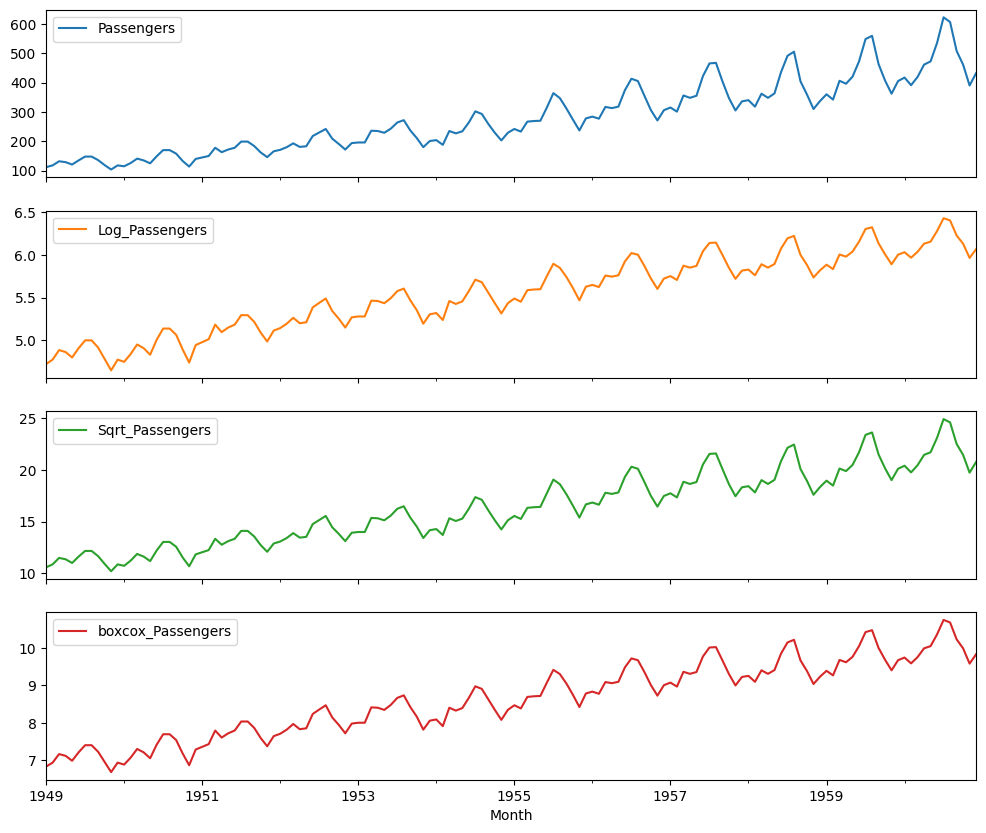

In [21]:
airpass.plot(subplots=True, figsize=(12,10))
plt.show()

* Stabilizing Variance: Reduces the impact of outliers and makes patterns more consistent.
* Improving Convergence: Especially in deep learning, normalized data speeds up training and leads to better results.
* Not Mandatory for Non-Parametric Models: While beneficial, transformations are not always required for non-parametric models like decision trees.

### ACF and PACF

In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

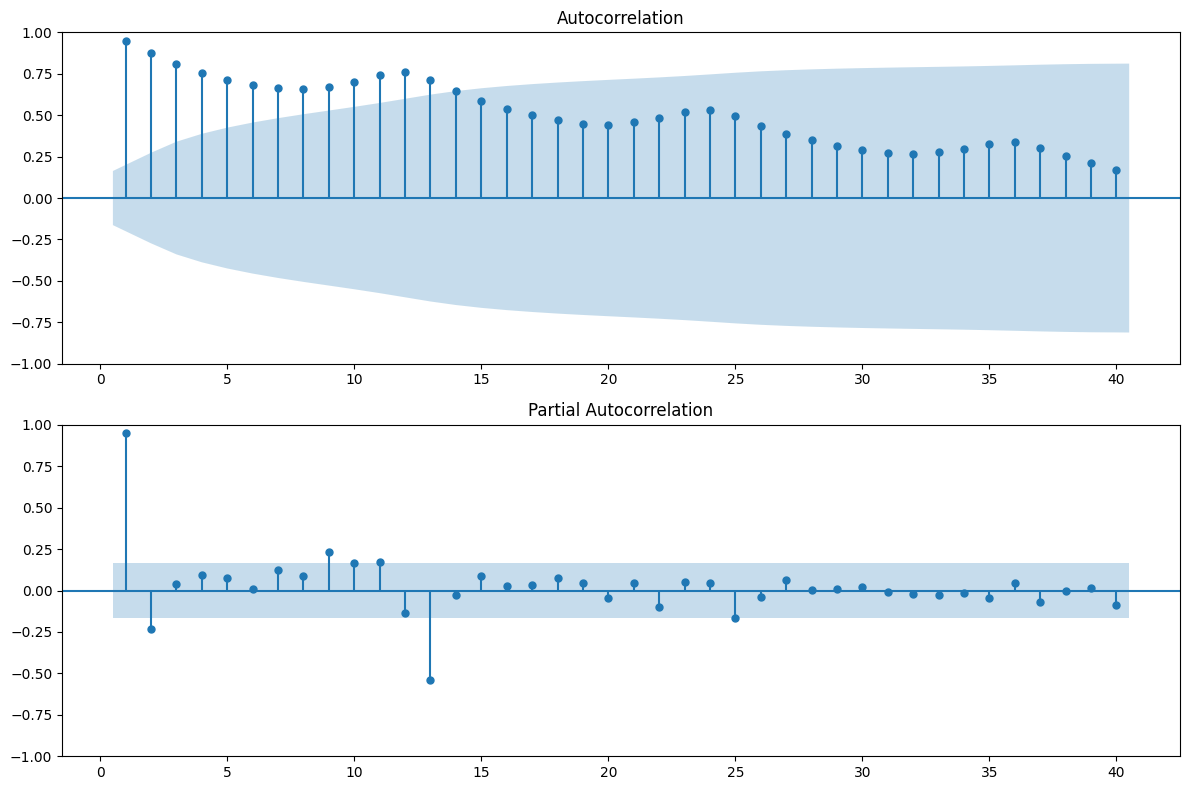

In [23]:
# Plot ACF and PACF for the original airline passenger data
plt.figure(figsize=(12, 8))
plt.subplot(211)
plot_acf(airpass['Passengers'], ax=plt.gca(), zero=False, lags=40)
plt.subplot(212)
plot_pacf(airpass['Passengers'], ax=plt.gca(), zero=False, lags=40)
plt.tight_layout()
plt.show()

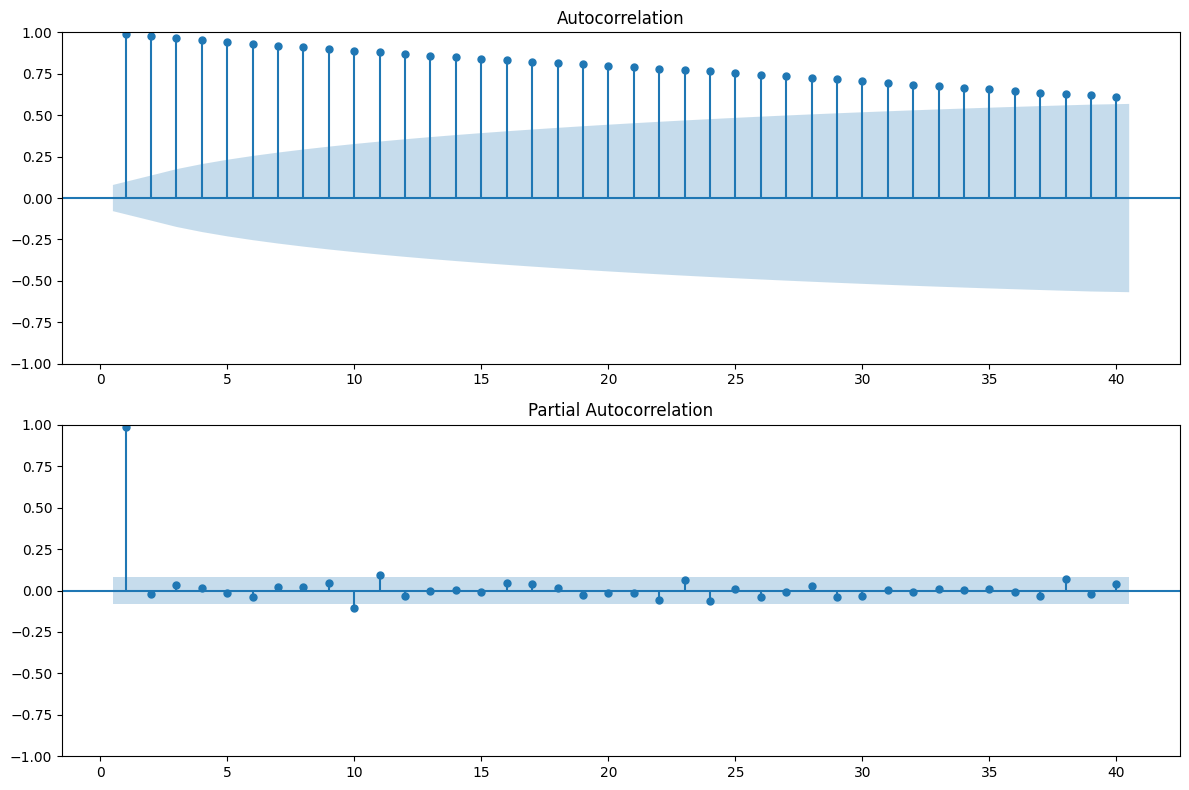

In [25]:
# Plot ACF and PACF for the original AAPL stock closing prices
plt.figure(figsize=(12, 8))
plt.subplot(211)
plot_acf(aapl_close, ax=plt.gca(), zero=False, lags=40)
plt.subplot(212)
plot_pacf(aapl_close, ax=plt.gca(), zero=False, lags=40)
plt.tight_layout()
plt.show()
plt.show()

### Stationarity

In [26]:
from statsmodels.tsa.stattools import adfuller

adfuller(airpass.Passengers)

(0.8153688792060482,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [27]:
# Function to perform ADF test
def adf_test(series, title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(), autolag='AIC')
    labels = ['ADF Test Statistic', 'p-value', '# Lags Used', 'Number of Observations Used']
    out = pd.Series(result[0:4], index=labels)
    for key, value in result[4].items():
        out[f'Critical Value ({key})'] = value
    print(out.to_string())
    if result[1] <= 0.05:
        print("=> The series is stationary.")
    else:
        print("=> The series is non-stationary.")

# Perform ADF test on original data
adf_test(airpass['Passengers'], title='Airline Passengers - Original')

Augmented Dickey-Fuller Test: Airline Passengers - Original
ADF Test Statistic               0.815369
p-value                          0.991880
# Lags Used                     13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
=> The series is non-stationary.


In [29]:
adf_test(aapl_close, title='AAPL Stock Closing Prices - Original')

Augmented Dickey-Fuller Test: AAPL Stock Closing Prices - Original
ADF Test Statistic              -1.905438
p-value                          0.329507
# Lags Used                      0.000000
Number of Observations Used    614.000000
Critical Value (1%)             -3.441045
Critical Value (5%)             -2.866259
Critical Value (10%)            -2.569283
=> The series is non-stationary.


In [30]:
# Differencing the airline passenger data
airpass['Passengers_diff'] = airpass['Passengers'].diff()
airpass.head()

,Passengers,Log_Passengers,Sqrt_Passengers,boxcox_Passengers,Passengers_diff
Month,,,,,
1949-01,112,4.718499,10.583005,6.827490,NaN
1949-02,118,4.770685,10.862780,6.932822,6.0
1949-03,132,4.882802,11.489125,7.161892,14.0
1949-04,129,4.859812,11.357817,7.114611,-3.0
1949-05,121,4.795791,11.000000,6.983787,-8.0


Augmented Dickey-Fuller Test: Airline Passengers - Differenced
ADF Test Statistic              -2.829267
p-value                          0.054213
# Lags Used                     12.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
=> The series is non-stationary.


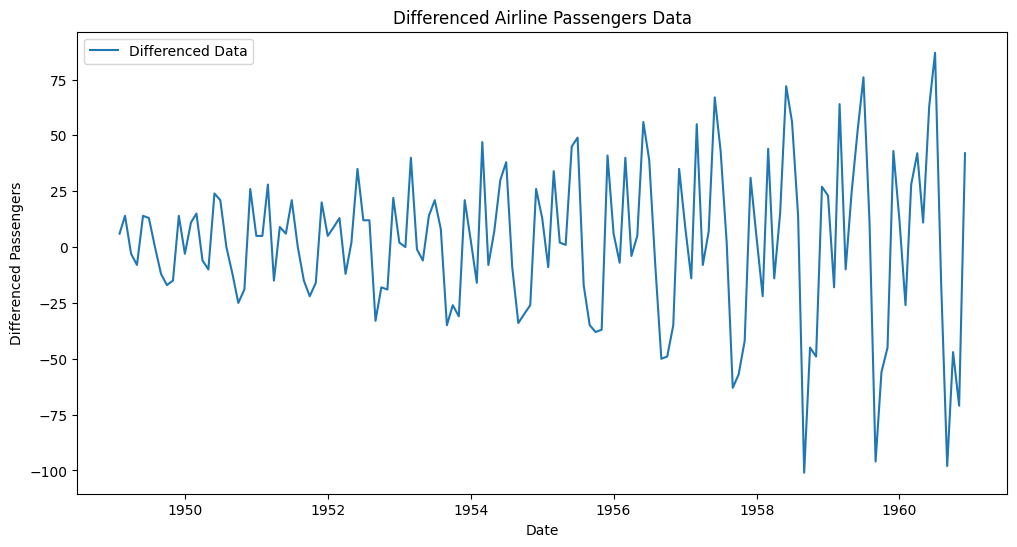

In [31]:
# Perform ADF test on differenced data
adf_test(airpass['Passengers_diff'].dropna(), title='Airline Passengers - Differenced')

# Plot the differenced data
plt.figure(figsize=(12, 6))
plt.plot(airpass.index.to_timestamp() , airpass['Passengers_diff'], label='Differenced Data')
plt.title('Differenced Airline Passengers Data')
plt.xlabel('Date')
plt.ylabel('Differenced Passengers')
plt.legend()
plt.show()

Augmented Dickey-Fuller Test: Airline boxcox Passengers - Differenced
ADF Test Statistic              -2.871708
p-value                          0.048738
# Lags Used                     14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
=> The series is stationary.


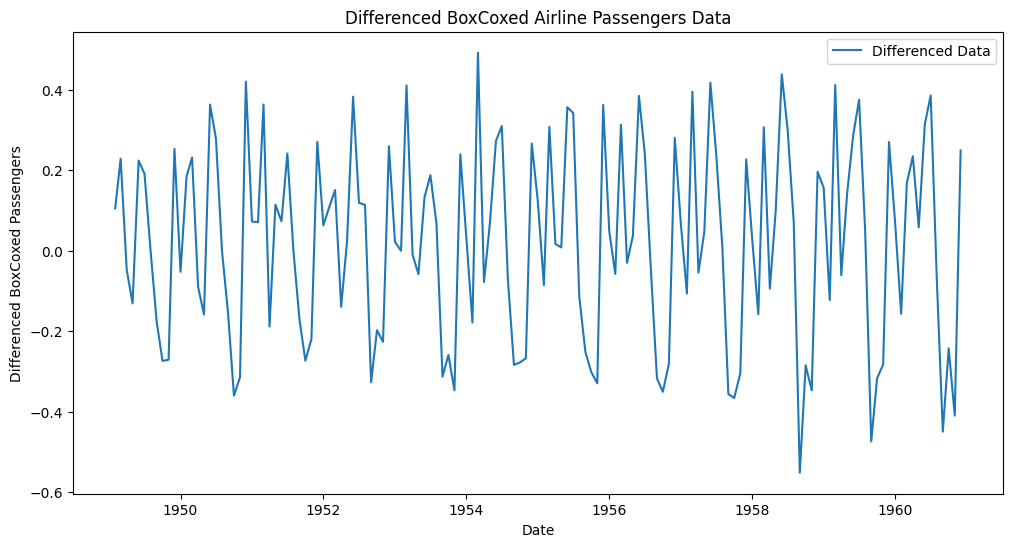

In [32]:
airpass['boxcox_Passengers_diff'] = airpass['boxcox_Passengers'].diff()

# Perform ADF test on differenced data
adf_test(airpass['boxcox_Passengers_diff'].dropna(), title='Airline boxcox Passengers - Differenced')

# Plot the differenced data
plt.figure(figsize=(12, 6))
plt.plot(airpass.index.to_timestamp() , airpass['boxcox_Passengers_diff'], label='Differenced Data')
plt.title('Differenced BoxCoxed Airline Passengers Data')
plt.xlabel('Date')
plt.ylabel('Differenced BoxCoxed Passengers')
plt.legend()
plt.show()

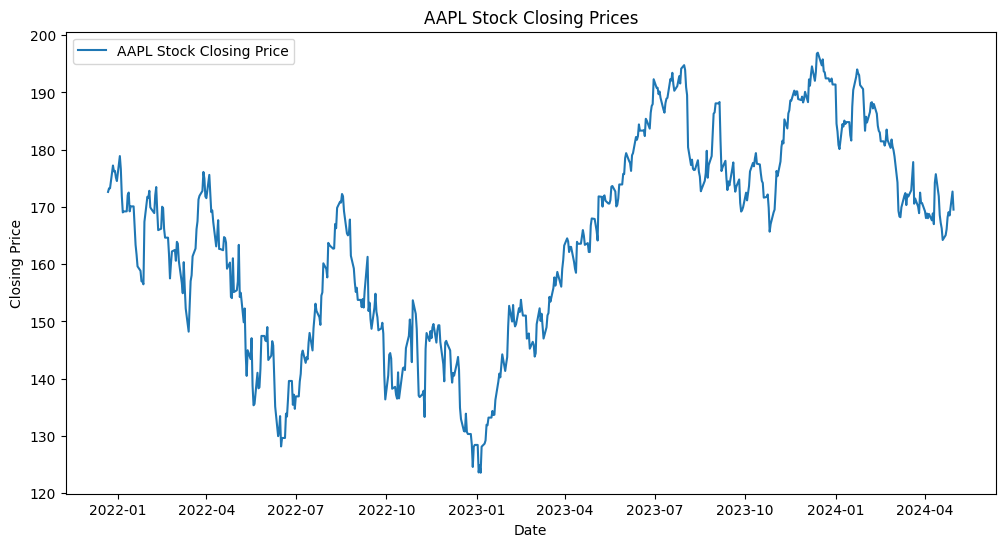

In [33]:
# Plot the AAPL stock closing price time series data
plt.figure(figsize=(12, 6))
plt.plot(aapl_close, label='AAPL Stock Closing Price')
plt.title('AAPL Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

Augmented Dickey-Fuller Test: AAPL Stock Closing Prices - Differenced
ADF Test Statistic             -24.483663
p-value                          0.000000
# Lags Used                      0.000000
Number of Observations Used    613.000000
Critical Value (1%)             -3.441063
Critical Value (5%)             -2.866266
Critical Value (10%)            -2.569287
=> The series is stationary.


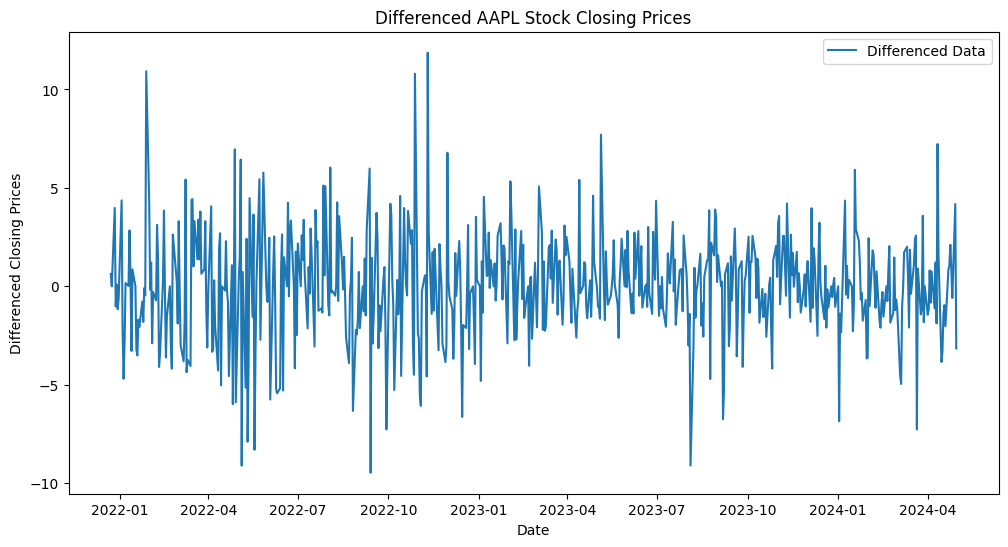

In [34]:
# Differencing the AAPL stock closing prices
aapl_close['diff'] = aapl_close.diff()

# Perform ADF test on differenced data
adf_test(aapl_close['diff'].dropna(), title='AAPL Stock Closing Prices - Differenced')

# Plot the differenced data
plt.figure(figsize=(12, 6))
plt.plot(aapl_close['diff'], label='Differenced Data')
plt.title('Differenced AAPL Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Differenced Closing Prices')
plt.legend()
plt.show()

By performing the ADF test, we can determine whether our time series data is stationary. If the series is non-stationary, we apply differencing to transform it into a stationary series. This transformation is essential for making reliable long-term predictions and for the proper functioning of many time series models

### Seasonal Decomposition

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose

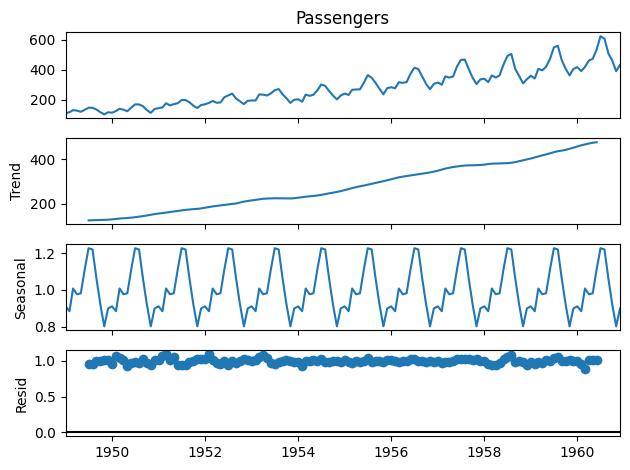

In [36]:
# Perform seasonal decomposition
temp_airpass = airpass.copy()
temp_airpass.index = temp_airpass.index.to_timestamp()

result_airpass = seasonal_decompose(temp_airpass['Passengers'], model='multiplicative')

# Plot the decomposition
result_airpass.plot()
plt.show()

In [39]:
aapl_close

Ticker,AAPL,diff
Date,,
2021-12-22,172.619461,NaN
2021-12-23,173.248428,0.628967
2021-12-24,173.248428,0.000000
2021-12-27,177.228821,3.980392
2021-12-28,176.206665,-1.022156
...,...,...
2024-04-24,168.225662,2.110046
2024-04-25,169.091583,0.865921
2024-04-26,168.504349,-0.587234


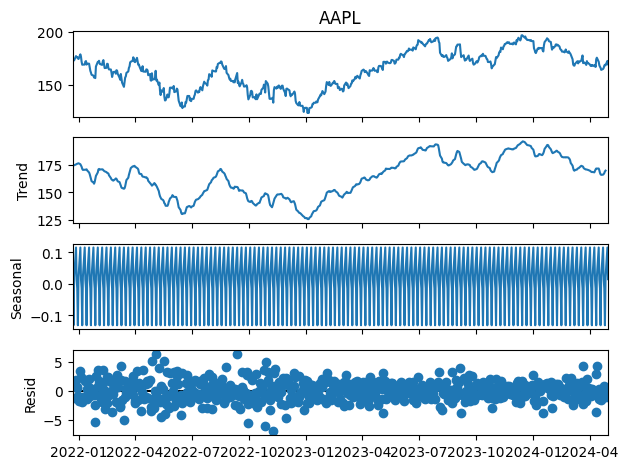

In [40]:
# Perform seasonal decomposition on AAPL closing prices
result_aapl = seasonal_decompose(aapl_close['AAPL'], model='additive') 

# Plot the decomposition
result_aapl.plot()
plt.show()

### Benchmarking Forecasting Models
we will create and plot benchmarks against the original airline passenger data. We'll split the data into training and test sets (with the last 24 observations as the test set) and create four benchmark models: naive forecaster, seasonal naive, mean forecast, and drift forecast.

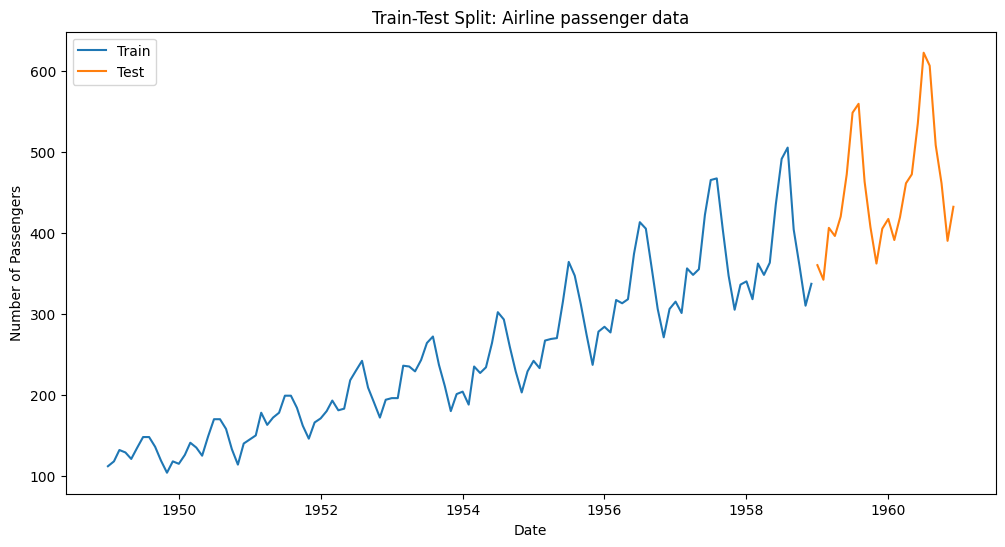

In [41]:
# Split the data
train = airpass[['Passengers']][:-24]
test = airpass[['Passengers']][-24:]

# Visualize the train and test data
plt.figure(figsize=(12, 6))
plt.plot(train.index.to_timestamp(), train, label='Train')
plt.plot(test.index.to_timestamp(), test, label='Test')
plt.title('Train-Test Split: Airline passenger data')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()

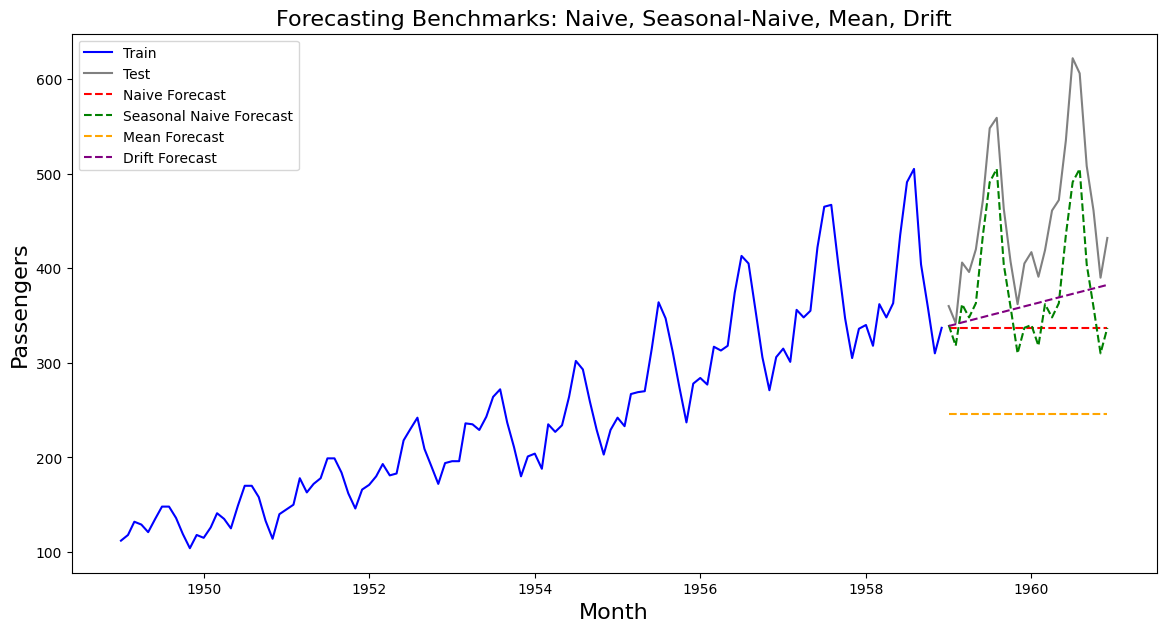

In [42]:
# Naive Forecast
# The naive forecaster simply uses the last observation from the training set
# as the forecast for all future observations.
y_hat_naive = test.copy()
y_hat_naive['naive'] = train.iloc[-1]['Passengers']

# Seasonal Naive Forecast:
# The seasonal naive forecaster uses the observation 
# from the same season of the previous cycle as the forecast.
season_length = 12
train_values_for_snaive = train['Passengers'].values[-season_length:]  # Last season's data
y_hat_snaive = test.copy()
y_hat_snaive['snaive'] = np.tile(train_values_for_snaive, len(test)//season_length+1)[:len(test)]

# Mean Forecast:
# The mean forecaster uses the mean of the training set as the forecast for all future observations.
y_hat_mean = test.copy()
y_hat_mean['mean'] = train['Passengers'].mean()

# Drift Forecast:
# The drift forecaster extrapolates a line between the first and last observations
# in the training set.
y_hat_drift = test.copy()
num_periods = len(train) - 1
drift = (train['Passengers'].iloc[-1] - train['Passengers'].iloc[0]) / num_periods
y_hat_drift['drift'] = [train['Passengers'].iloc[-1] + (i+1) * drift for i in range(len(test))]


# Ensure index types are correct
train.index = pd.to_datetime(train.index.to_timestamp())
test.index = pd.to_datetime(test.index.to_timestamp())
y_hat_naive.index = pd.to_datetime(y_hat_naive.index.to_timestamp())
y_hat_snaive.index = pd.to_datetime(y_hat_snaive.index.to_timestamp())
y_hat_mean.index = pd.to_datetime(y_hat_mean.index.to_timestamp())
y_hat_drift.index = pd.to_datetime(y_hat_drift.index.to_timestamp())

# Visualization
plt.figure(figsize=(14, 7))
plt.plot(train.index, train['Passengers'], label='Train', color='blue')
plt.plot(test.index, test['Passengers'], label='Test', color='grey')
plt.plot(y_hat_naive.index, y_hat_naive['naive'], label='Naive Forecast', color='red', linestyle='--')
plt.plot(y_hat_snaive.index, y_hat_snaive['snaive'], label='Seasonal Naive Forecast', color='green', linestyle='--')
plt.plot(y_hat_mean.index, y_hat_mean['mean'], label='Mean Forecast', color='orange', linestyle='--')
plt.plot(y_hat_drift.index, y_hat_drift['drift'], label='Drift Forecast', color='purple', linestyle='--')

plt.title('Forecasting Benchmarks: Naive, Seasonal-Naive, Mean, Drift', fontsize=16)
plt.xlabel('Month',fontsize=16)
plt.ylabel('Passengers',fontsize=16)
plt.legend(loc='upper left')
plt.show()

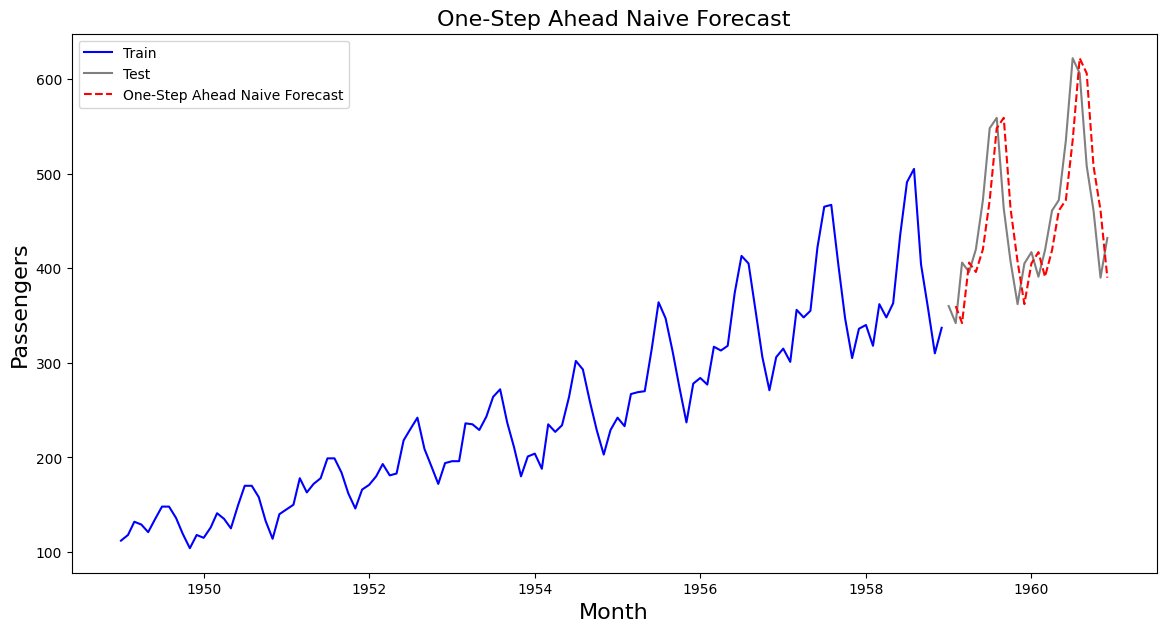

In [43]:
# Correcting the Naive Forecast for a true one-step ahead visualization
y_hat_naive_corrected = airpass.copy()
y_hat_naive_corrected['naive_one_step'] = airpass['Passengers'].shift(1)

# Adjusting visualization to focus on one-step ahead naive forecast in the test set
plt.figure(figsize=(14, 7))

# Original data (Train and Test)
plt.plot(train.index, train['Passengers'], label='Train', color='blue')
plt.plot(test.index, test['Passengers'], label='Test', color='grey')

# One-step ahead naive forecast (Test set only)
# Shifting the test data one step for the naive forecast
test_shifted_for_naive = test['Passengers'].shift(1)
plt.plot(test.index, test_shifted_for_naive, label='One-Step Ahead Naive Forecast', color='red', linestyle='--')

plt.title('One-Step Ahead Naive Forecast', fontsize=16)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Passengers',fontsize=16)
plt.legend(loc='upper left')
plt.show()

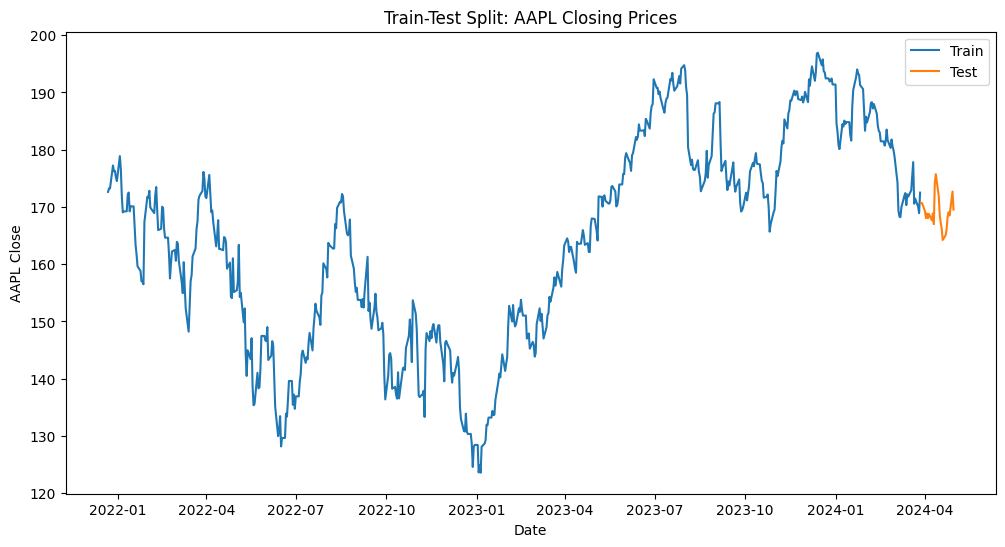

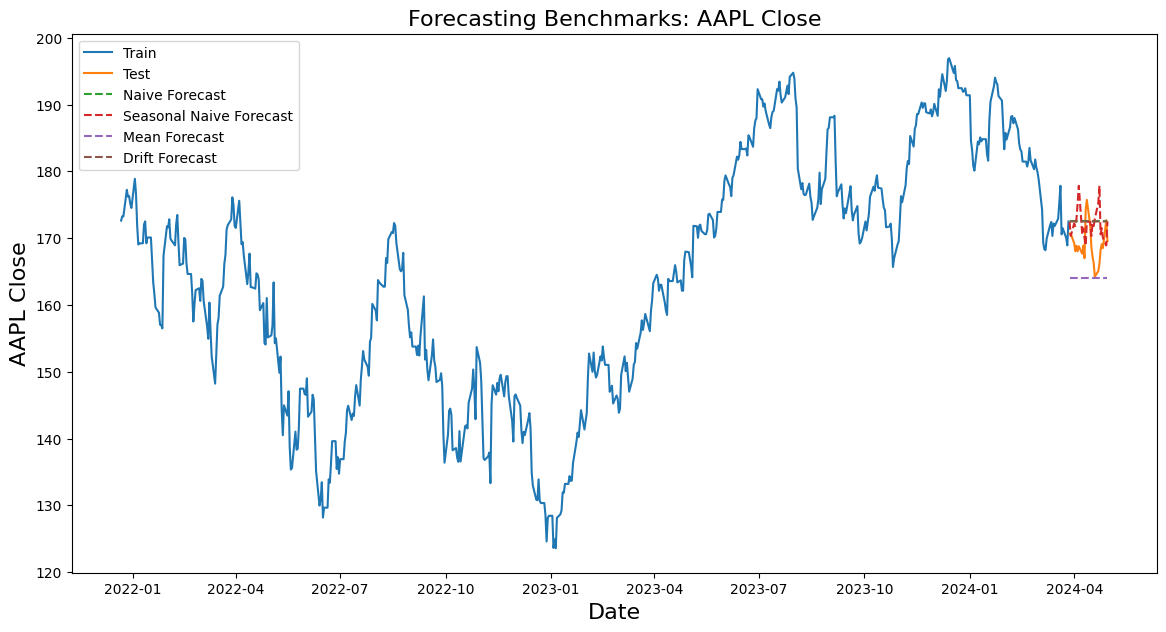

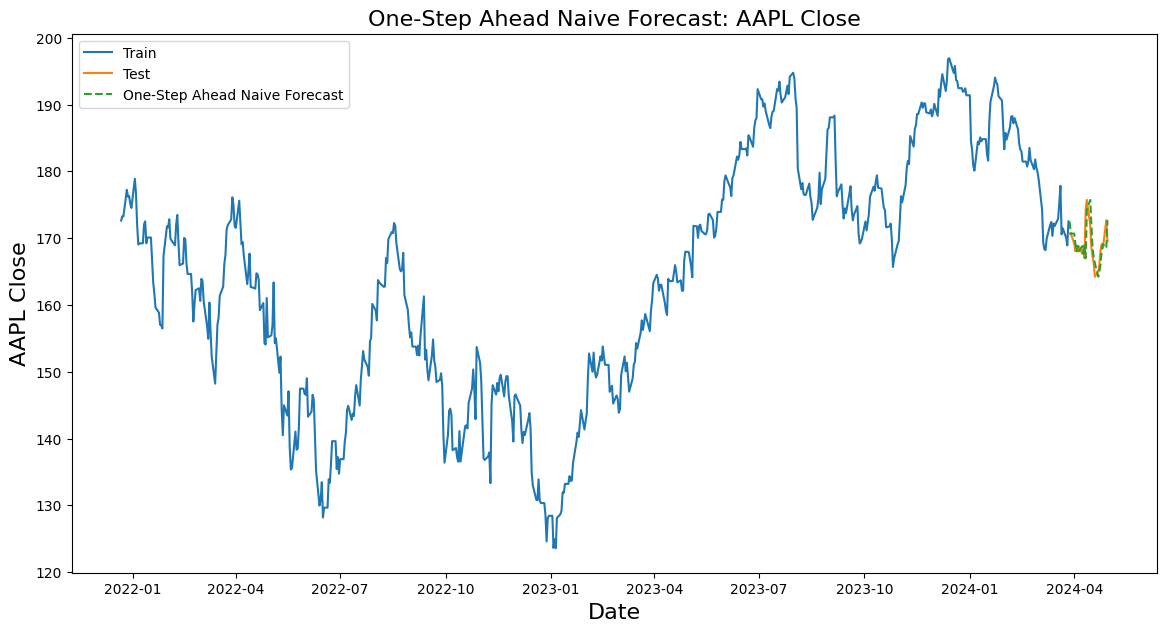

In [44]:
# Split the data
train = aapl_close[['AAPL']][:-24]
test = aapl_close[['AAPL']][-24:]

# Visualize the train and test data
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['AAPL'], label='Train')
plt.plot(test.index, test['AAPL'], label='Test')
plt.title('Train-Test Split: AAPL Closing Prices')
plt.xlabel('Date')
plt.ylabel('AAPL Close')
plt.legend()
plt.show()

# Naive Forecast
# The naive forecaster uses the last observation from the training set as the forecast for all future points.
y_hat_naive = test.copy()
y_hat_naive['naive'] = train.iloc[-1]['AAPL']

# Seasonal Naive Forecast
season_length = 12
last_season = train['AAPL'].values[-season_length:]
y_hat_snaive = test.copy()
y_hat_snaive['snaive'] = np.tile(last_season, len(test)//season_length + 1)[:len(test)]

# Mean Forecast
y_hat_mean = test.copy()
y_hat_mean['mean'] = train['AAPL'].mean()

# Drift Forecast
num_periods = len(train) - 1
drift = (train['AAPL'].iloc[-1] - train['AAPL'].iloc[0]) / num_periods
y_hat_drift = test.copy()
y_hat_drift['drift'] = [train['AAPL'].iloc[-1] + (i+1) * drift for i in range(len(test))]

# Visualization of forecasts
plt.figure(figsize=(14, 7))
plt.plot(train.index, train['AAPL'], label='Train')
plt.plot(test.index, test['AAPL'], label='Test')
plt.plot(y_hat_naive.index, y_hat_naive['naive'], label='Naive Forecast', linestyle='--')
plt.plot(y_hat_snaive.index, y_hat_snaive['snaive'], label='Seasonal Naive Forecast', linestyle='--')
plt.plot(y_hat_mean.index, y_hat_mean['mean'], label='Mean Forecast', linestyle='--')
plt.plot(y_hat_drift.index, y_hat_drift['drift'], label='Drift Forecast', linestyle='--')

plt.title('Forecasting Benchmarks: AAPL Close', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('AAPL Close', fontsize=16)
plt.legend(loc='upper left')
plt.show()

# One-Step Ahead Naive Forecast Visualization
y_hat_naive_one_step = aapl_close.copy()
y_hat_naive_one_step['naive_one_step'] = aapl_close['AAPL'].shift(1)

plt.figure(figsize=(14, 7))
plt.plot(train.index, train['AAPL'], label='Train')
plt.plot(test.index, test['AAPL'], label='Test')
plt.plot(test.index, y_hat_naive_one_step['naive_one_step'][-24:], label='One-Step Ahead Naive Forecast', linestyle='--')

plt.title('One-Step Ahead Naive Forecast: AAPL Close', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('AAPL Close', fontsize=16)
plt.legend(loc='upper left')
plt.show()